

# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset focuses on the issue of whether or not people show up for their appointment and gathers data from 110k medical appointments in Brazil. Each column contains a number of patient-related characteristics as follows :

  + PatientId            : Identification of a patient.
  + AppointmentID        : Identification of each appointment.
  + Gender               : Male or Female.
  + DataMarcacaoConsulta : The day of the actuall appointment, when they have to visit the doctor.
  + DataAgendamento      : The day someone called or registered the appointment, this is before appointment of course.
  + Age                  : How old is the patient.
  + Neighbourhood        : Where the appointment takes place.
  + Scholarship          : True of False ( Scholarship is "Bolsa Família" was a social welfare program of the Government of Brazil ).
  + Hipertension         : True or False
  + Diabetes             : True or False
  + Alcoholism           : True or False
  + Handcap              : True or False
  + SMS_received         : 1 or more messages sent to the patient.
  + No-show              : True or False.

### Question(s) for Analysis

1. What is the percentage of patients who fail to show up for their appointments?
2. Does a patient's age have any bearing on whether they keep an appointment?
3. Do patients with a scholorship show up more for their appointments?
4. Do patients with disabilities attend their appointments more  often?
5. Which gender has the highest likelihood of missing an appointment?
6. Do clients who receive SMS reminders show up more for their appointments?
7. Do patients who have scheduled appointments for the same day show up more for their appointments? 

In [1]:
# the packages used in this analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# percentage function used in this analysis 
def percentage(dividend , divisor):
  percentage = 100 * dividend / divisor
  percentage = float('%.2f' % round(percentage, 2))
  return percentage 

In [3]:
# fonction to print the presentage
def print_percentage (the_percentage ):
 print(f"the percentage is {the_percentage}%.")

<a id='wrangling'></a>
## Data Wrangling



 This section explores the unprocessed data.

In [4]:
# loading the dataset
df_appointments = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_appointments.head() 
# Renaming the dataset
df_app = df_appointments
df_app.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Exploring the shape of the dataset
df_app.shape

(110527, 14)

This means there is 110527 entries and 14 columns as shown in the cell above .

In [6]:
# Searching for informations about the dataset
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The cell above shows the different types of values that each column contains ( float , ints and strings ) . Since there are 110527 entries and each column has 110527 non-null values, we can conclude that there are no null values in this dataset. 

In [7]:
# Searching for more informations about the dataset
df_app.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The information in the table above shows that the average patient age is 37, that the ages range from 0 to 115, and that because the dataset only contains true or false values, the maximum and lowest values for the other columns are 0 and 1, respectively.

In [8]:
# Searching for informations about the colomns
df_app.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

This database contains 62299 patients, 110527 appointments, male and female genders, 104 different ages, from 81 different neighborhoods, whether the patient showed up or not, received an SMS or not, and if he has a (scholarship, hypertension, diabetes, alcoholism, handicap) or not.


### Data Cleaning

 

This section will detail the adjustments made to this dataset to improve its efficiency.

To begin, let us lower case the names of the colomns to avoid errors caused by capital letters in a colomn name.

In [9]:
df_app.columns= df_app.columns.str.lower()
df_app.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Let's rename the column "no-show" to "no_show" in order to prevent errors caused by the hyphen sign.

In [10]:
df_app.rename(columns = {'no-show':'no_show'}, inplace = True)
df_app[['appointmentid','no_show']].head()

,appointmentid,no_show
0,5642903,No
1,5642503,No
2,5642549,No
3,5642828,No
4,5642494,No


Let's search for more changes that can be made to this dataset.

In [11]:
df_app.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The "handcap" column displays a maximum value of 4, to make the analysis easier let's change the values to "True" and "False".

In [12]:
df_app['handcap'] = df_app['handcap'].replace({2:1 ,3:1,4:1})
df_app['handcap'].unique()

array([0, 1])

In this analysis, we'll pay particular attention to the day of the appointment and the date it was scheduled, so let's extract those dates.

In [13]:
# Let's see the colomns
df_app[['appointmentid','scheduledday','appointmentday']].head()

,appointmentid,scheduledday,appointmentday
0,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
1,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z
3,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
4,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z


Both of the dates have an hour time associated to them, but our interest is in the date of scheduling and the appointment, so lets create these colomns.

In [14]:
# The colomn of the date of the appointment that patients called or registered for
df_app[['date_scheduled', 'hour']] = df_app['scheduledday'].str.split('T', expand=True)
df_app[['appointmentid', 'date_scheduled']].head()

,appointmentid,date_scheduled
0,5642903,2016-04-29
1,5642503,2016-04-29
2,5642549,2016-04-29
3,5642828,2016-04-29
4,5642494,2016-04-29


In [15]:
# The date of The day of the actuall appointment
df_app[['date_appointment','Hour']] = df_app['appointmentday'].str.split('T', expand=True)
df_app[['appointmentid', 'date_scheduled','date_appointment']].head()

,appointmentid,date_scheduled,date_appointment
0,5642903,2016-04-29,2016-04-29
1,5642503,2016-04-29,2016-04-29
2,5642549,2016-04-29,2016-04-29
3,5642828,2016-04-29,2016-04-29
4,5642494,2016-04-29,2016-04-29


In [16]:
# Let's search for the nature of the "date_scheduled" and "date_appointment" colomns
df_app[['date_scheduled','date_appointment']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 2 columns):
date_scheduled      110527 non-null object
date_appointment    110527 non-null object
dtypes: object(2)
memory usage: 1.7+ MB


As we can see, they are both of the string type when they should be of the datetime type.

In [17]:
# Let's change the type of the colomns to datetime
df_app['date_scheduled'] = pd.to_datetime(df_app['date_scheduled'], format='%Y-%m-%d')
df_app['date_appointment'] = pd.to_datetime(df_app['date_appointment'], format='%Y-%m-%d')
df_app[['date_scheduled','date_appointment']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 2 columns):
date_scheduled      110527 non-null datetime64[ns]
date_appointment    110527 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.7 MB


<a id='eda'></a>
## Exploratory Data Analysis



### Question 1 :
    What is the percentage of patients who fail to show up for their appointments?

Let's start by searching for distinct values in the 'no show' column.

In [18]:
df_app['no_show'].unique()

array(['No', 'Yes'], dtype=object)

Now, Let's find the percentage of patients that missed their scheduled appointments.

In [19]:
patients_noshow_count = df_app.query('no_show=="Yes"')['appointmentid'].count()
print(f"The number of patients that did not attend their appointment is {patients_noshow_count}.")

The number of patients that did not attend their appointment is 22319.


In [20]:
# Number of patients 
N_patients = df_app['no_show'].count()  
# Percentage of patients who did not attended their appointments as scheduled
patients_show_percentage = percentage(patients_noshow_count,N_patients)
print_percentage(patients_show_percentage)

the percentage is 20.19%.


Let's find the percentage of patients that didn't missed their scheduled appointments.

In [21]:
patients_show_count = df_app.query('no_show=="No"')['appointmentid'].count()
print(f"The number of patients that attend their appointment is {patients_noshow_count}.")

The number of patients that attend their appointment is 22319.


In [22]:
# Percentage of patients who attended their appointments as scheduled
patients_noshow_percentage = percentage(patients_show_count,N_patients)
print_percentage(patients_noshow_percentage)

the percentage is 79.81%.


Let's use a pie chart to clearly show the percentages  :

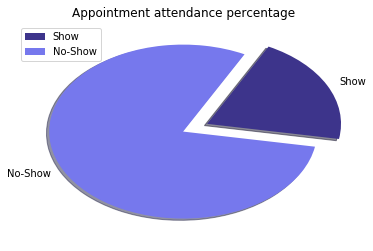

In [23]:
show_percentage = np.array([patients_show_percentage,patients_noshow_percentage])
Labels = ["Show", "No-Show"]
Explode = [0.2, 0]
Colors = ["#3D348B" , "#7678ED"]
plt.pie(show_percentage, labels = Labels , startangle = -10, explode=Explode , shadow = True , colors=Colors )
plt.legend()
plt.title('Appointment attendance percentage')
plt.show();

### Answer 1 :
    The percentage of patients that missed their scheduled appointments is 20.2% and the percentage of patients that didn't missed their scheduled appointments is 79.8%.

### Question 2 :
    Does a patient's age have any bearing on whether they keep an appointment?

First , let's lock for the unique ages in the dataset :

In [24]:
df_app['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

The array above displays a range of ages, therefore we'll categorize them into "Children," "Youth," "Adults," and "Seniors":

First , the children categorie ages between 0 and 14 who did not the appointment:

In [25]:
patients_ch = df_app.query('age>=0 & age<=14 & no_show=="Yes"' )['appointmentid'].count()
print(f"The number of children who attended their appointment {patients_ch}.")

The number of children who attended their appointment 4926.


Then , the Youth categorie ages between 14 and 24 who did not the appointment:

In [26]:
patients_y = df_app.query('age>14 & age<=24 & no_show=="Yes"')['appointmentid'].count()
print(f"The number of youth patients who did not attended their appointment {patients_y}.")

The number of youth patients who did not attended their appointment 3540.


Next , the Adults categorie ages between 24 and 64 who did not attended the appointment:

In [27]:
patients_ad = df_app.query('age>24 & age<=64 & no_show=="Yes"')['appointmentid'].count()
print(f"The number of adults who did not attended their appointment {patients_ad}.")

The number of adults who did not attended their appointment 11620.


Finally , the Seniors categorie ages above 64 who attended the appointment:

In [28]:
patients_sn = df_app.query('age>64 & no_show=="Yes"')['appointmentid'].count()
print(f"The number of seniors who did not attended their appointment {patients_sn}.")

The number of seniors who did not attended their appointment 2233.


Let's use a pie chart to display the four categories of patients :

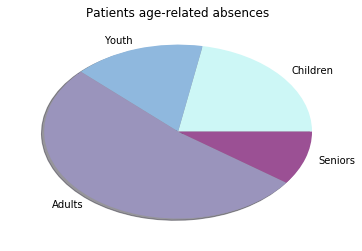

In [29]:
show_percentage = np.array([ patients_ch , patients_y , patients_ad , patients_sn ])
Labels = ["Children", "Youth" , "Adults" , "Seniors"]
Colors = ["#CDF7F6" , "#8FB8DE" , "#9A94BC" ,"#9B5094"]
plt.pie(show_percentage, labels = Labels , shadow = True , colors=Colors)
plt.title('Patients age-related absences')
plt.show();

### Answer 2 :
    Adults are the more likely to fail to appear, followed by children, youth, and seniors.

### Question 3 :
    Do patients with a scholorship show up more for their appointments?

First , Let's study patients with scholarship :  

In [30]:
# patients with a scholarship
patients_w_s = df_app.query('scholarship==True')['appointmentid'].count()
print(f"The number of patients with a scholarship is {patients_w_s}.")

The number of patients with a scholarship is 10861.


In [31]:
# number of patients with a scholarship who attend their visits
patients_s_show = df_app.query('scholarship==True & no_show=="No"')['appointmentid'].count()
print(f"The number of patients with a scholarship who attend their visits is {patients_w_s}.")

The number of patients with a scholarship who attend their visits is 10861.


In [32]:
# percentage of patients with scholarship who attend their visits
percentage_p_s_show = percentage(patients_s_show,patients_w_s)
print_percentage(percentage_p_s_show)

the percentage is 76.26%.


In [33]:
# number of patients with a scholarship who did not attend their visits
patients_s_noshow = df_app.query('scholarship==True & no_show=="Yes"')['appointmentid'].count()
print(f"The number of patients with a scholarship who did not attend their visits is {patients_s_noshow}.")

The number of patients with a scholarship who did not attend their visits is 2578.


In [34]:
# percentage of patients with scholarship who did not attend their visits
pr_s_noshow = percentage(patients_s_noshow,patients_w_s)
print_percentage(pr_s_noshow) 

the percentage is 23.74%.


Now, let us look at patients who do not have a scholarship: 

In [35]:
# patients who do not have a scholarship
patients_no_s = df_app.query('scholarship==False')['appointmentid'].count()
print(f"The number of patients who do not have a scholarship is {patients_no_s}.")

The number of patients who do not have a scholarship is 99666.


In [36]:
# number of patients who do not have a scholarship and attend their visits
patients_n_s_show = df_app.query('scholarship==False & no_show=="No"')['appointmentid'].count()
print(f"The number of patients with a scholarship who attend their visits is {patients_w_s}.")

The number of patients with a scholarship who attend their visits is 10861.


In [37]:
# percentage of patients who do not have a scholarship and attend their visits
pr_patients_n_s_show = percentage(patients_n_s_show,patients_no_s)
print_percentage(pr_patients_n_s_show) 

the percentage is 80.19%.


In [38]:
# number of patients who do not have a scholarship and do not attend their visits
patients_n_s_noshow = df_app.query('scholarship==False & no_show=="Yes"')['appointmentid'].count()
print(f"The number of patients with a scholarship and do not attend their visits is {patients_n_s_noshow}.")

The number of patients with a scholarship and do not attend their visits is 19741.


In [39]:
# percentage of patients who do not have a scholarship and do not attend their visits
pr_patients_n_s_noshow = percentage(patients_n_s_noshow,patients_no_s)
print_percentage(pr_patients_n_s_noshow) 

the percentage is 19.81%.


Let's compare the results using a bar chart :

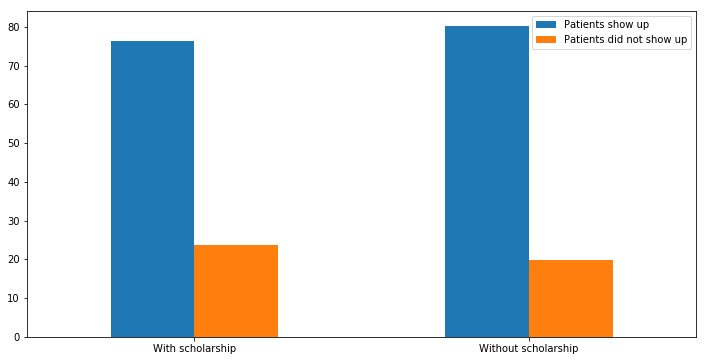

In [40]:
patients_show = [percentage_p_s_show, pr_patients_n_s_show]
patients_no_show = [pr_s_noshow, pr_patients_n_s_noshow]
index = ['With scholarship', 'Without scholarship' ]
df = pd.DataFrame({'Patients show up ': patients_show,'Patients did not show up': patients_no_show}, index=index)
ax = df.plot.bar(rot=0,figsize=(12,6))

### Answer 3 :
    The analysis above leads us to the conclusion that patients with scholarshps are more likely to miss their appointments .

### Question 4 :
    Do patients with disabilities attend their appointments more  often?

First , Let's study patients with a handicap : 

In [41]:
# patients with a handicap 
patients_w_hc = df_app.query('handcap==True')['appointmentid'].count()
print(f"The number of patients with a handicap  is {patients_w_hc}.")

The number of patients with a handicap  is 2241.


In [42]:
# number of patients who have a handicap and attend their visits
patients_hc_show = df_app.query('handcap==True & no_show=="No"')['appointmentid'].count()
print(f"The number of patients who have a handicap and attend their visits is {patients_hc_show}.")

The number of patients who have a handicap and attend their visits is 1834.


In [43]:
# percentage of patients with a handicap who did attend their visits
pr_hc_show = percentage(patients_hc_show,patients_w_hc)
print_percentage(pr_hc_show)

the percentage is 81.84%.


In [44]:
# number of patients with a handicap who did not attend their visits
patients_hc_noshow = df_app.query('handcap==True & no_show=="Yes"')['appointmentid'].count()
print(f"The number of patients who have a handicap and did not attend their visits is {patients_hc_noshow}.")

The number of patients who have a handicap and did not attend their visits is 407.


In [45]:
# percentage of patients with a handicap who did not attend their visits
pr_hc_noshow = percentage(patients_hc_noshow,patients_w_hc)
print_percentage(pr_hc_noshow)

the percentage is 18.16%.


Now , Let's study patients who are not handicapped:

In [46]:
# patients who are not handicapped 
patients_wt_hc = df_app.query('handcap==False')['appointmentid'].count()
print(f"The number of patients without a handicap  is {patients_wt_hc}.")

The number of patients without a handicap  is 108286.


In [47]:
# number of patients who do not have a handicap and attend their visits
patients_n_hc_show = df_app.query('handcap==False & no_show=="No"')['appointmentid'].count()
print(f"The number of patients who do not have a handicap and attend their visits is {patients_n_hc_show}.")

The number of patients who do not have a handicap and attend their visits is 86374.


In [48]:
# percentage of patients who are not handicapped and did attend their visits
pr_patients_n_hc_show = percentage(patients_n_s_show,patients_wt_hc)
print_percentage(pr_patients_n_hc_show)

the percentage is 73.81%.


In [49]:
# number of patients who do not have a handicap and did not attend their visits
patients_n_hc_noshow = df_app.query('handcap==False & no_show=="Yes"')['appointmentid'].count()
print(f"The number of patients who do not have a handicap and did not attend their visits is {patients_n_hc_noshow}.")

The number of patients who do not have a handicap and did not attend their visits is 21912.


In [50]:
# percentage of patients who are not handicapped and did not attend their visits
pr_patients_n_hc_noshow = percentage(patients_n_hc_noshow,patients_wt_hc)
print_percentage(pr_patients_n_hc_noshow)

the percentage is 20.24%.


Let's compare the results using a bar chart :

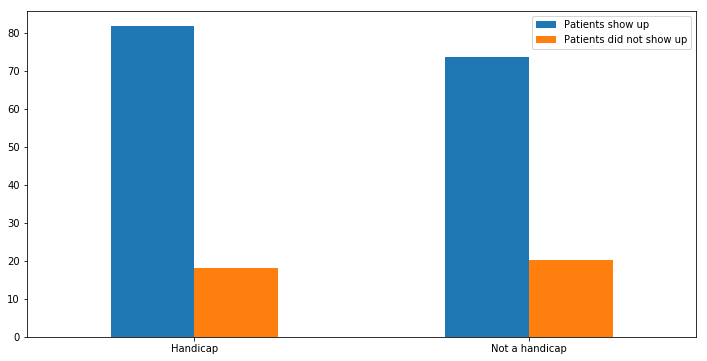

In [51]:
patients_show = [pr_hc_show, pr_patients_n_hc_show]
patients_no_show = [pr_hc_noshow, pr_patients_n_hc_noshow]
index = ['Handicap', 'Not a handicap' ]
df = pd.DataFrame({'Patients show up ': patients_show,'Patients did not show up': patients_no_show}, index=index)
ax = df.plot.bar(rot=0,figsize=(12,6))

### Answer 4 :
    According to the analysis above , patients without a handicap are more likely to miss their appointments .

### Question 5 :
    Which gender has the highest likelihood of missing an appointment?

Let us calculate the percentage of female patients who missed their appointments :

In [52]:
# Number of female patients 
patients_f = df_app.query('gender=="F"')['appointmentid'].count()
print(f"The number of female patients is {patients_f}.")

The number of female patients is 71840.


In [53]:
# Number of female patients who missed their appointments 
patients_f_noshow = df_app.query('gender=="F" & no_show=="Yes"')['appointmentid'].count()
print(f"The number of female patients who missed their appointments is {patients_f_noshow}.")

The number of female patients who missed their appointments is 14594.


In [54]:
# percentage of female patients who missed their appointments 
pr_patients_f_noshow = percentage(patients_f_noshow,patients_f)
print_percentage(pr_patients_f_noshow)

the percentage is 20.31%.


    Let us calculate the percentage of male patients who missed their appointments :

In [55]:
# Number of male patients 
patients_m = df_app.query('gender=="M"')['appointmentid'].count()
print(f"The number of male patients is {patients_m}.")

The number of male patients is 38687.


In [56]:
# Number of male patients who missed their appointments
patients_m_noshow = df_app.query('gender=="M" & no_show=="Yes"')['appointmentid'].count()
print(f"The number of male patients who missed their appointments is {patients_m_noshow}.")

The number of male patients who missed their appointments is 7725.


In [57]:
# percentage of female patients who missed their appointments 
pr_patients_m_noshow = percentage(patients_m_noshow,patients_m)
print_percentage(pr_patients_m_noshow)

the percentage is 19.97%.


Let's compare the results using a bar chart :

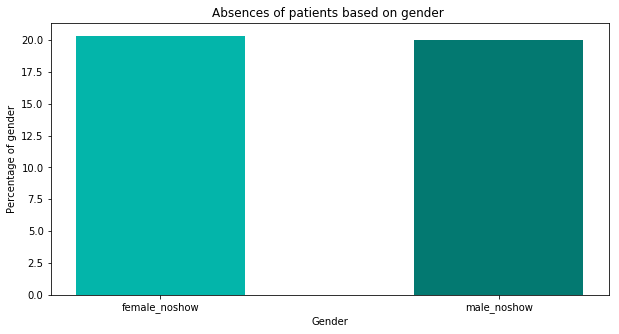

In [58]:
patients_no_show = ['female_noshow','male_noshow']
pr_patients_no_show = [pr_patients_f_noshow,pr_patients_m_noshow]
Colors = ["#03B5AA" , "#037971"]
plt.figure(figsize=(10,5))
plt.bar(patients_no_show,pr_patients_no_show,width=0.5,color=Colors)
plt.title('Absences of patients based on gender ')
plt.xlabel('Gender')
plt.ylabel('Percentage of gender');

### Answer 5 :
    We conclude from the analysis above that gender is unrelated to a patient's absence.

### Question 6 :
    Do clients who receive SMS reminders show up more for their appointments?

To start, Let's calculat the percentage of patients who got SMS reminders but did not attend their appointments :

In [59]:
#   Number of patients who got SMS reminders
patient_r_sms = df_app.query('sms_received==True')['appointmentid'].count()
print(f"The number of patients who got SMS reminders is {patient_r_sms}.")

The number of patients who got SMS reminders is 35482.


In [60]:
#   patients who got SMS reminders and not attend their appointments 
patient_r_noshow  = df_app.query('sms_received==True & no_show=="Yes"')['appointmentid'].count()
print(f"The number of patients who got SMS reminders and not attend their appointments is {patient_r_noshow}.")

The number of patients who got SMS reminders and not attend their appointments is 9784.


In [61]:
#   percentage of patients who got SMS reminders and not attend their appointments 
pr_patients_r_noshow = percentage(patient_r_noshow,patient_r_sms)
print_percentage(pr_patients_r_noshow)

the percentage is 27.57%.


Now, Let's calculat the percentage of patients who did not receive SMS reminders and did not attend their appointments :

In [62]:
#  patients who did not receive SMS reminders
patient_no_r = df_app.query('sms_received==False')['appointmentid'].count()
print(f"The number of patients who did not receive SMS reminders is {patient_no_r}.")

The number of patients who did not receive SMS reminders is 75045.


In [63]:
#  patients who did not receive SMS reminders and did not attend their appointments
patient_no_r_noshow  = df_app.query('sms_received==False & no_show=="Yes"')['appointmentid'].count()
print(f"The number of patients who got SMS reminders and not attend their appointments is {patient_no_r_noshow}.")

The number of patients who got SMS reminders and not attend their appointments is 12535.


In [64]:
#   percentage of patients who did not receive SMS reminders and did not attend their appointments
pr_patients_no_r_noshow = percentage(patient_no_r_noshow,patient_r_sms)
print_percentage(pr_patients_no_r_noshow)

the percentage is 35.33%.


Let's compare the results using a bar chart :

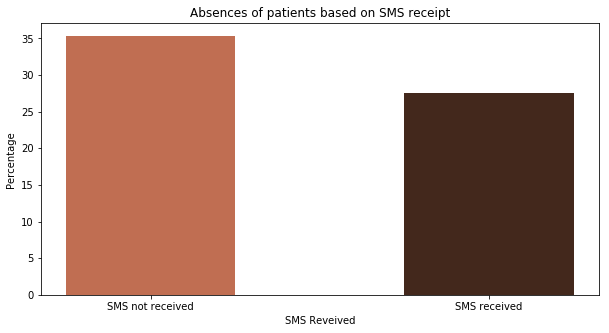

In [65]:
conditions = np.array(['SMS received','SMS not received'])
patients_no_show = [pr_patients_r_noshow,pr_patients_no_r_noshow]
Colors = ["#43281C" , "#C06E52"]
plt.figure(figsize=(10,5))
plt.bar(conditions,patients_no_show,width=0.5,color=Colors)
plt.title('Absences of patients based on SMS receipt')
plt.xlabel('SMS Reveived')
plt.ylabel('Percentage ');

### Answer 6 :
    We conclude from the analysis above that patients who did not receive SMS reminders are more likely to miss their               appointments .

### Question 7 :
    Do patients who have scheduled appointments for the same day show up more for their appointments? 

To Begin , Let's calculat the percentage of patients who have scheduled appointments for the same day but did not attend their appointments :

In [66]:
# patients who have scheduled appointments for the same day
df_patients_sameday=df_app.query('date_scheduled==date_appointment')
df_patients_sameday[['appointmentid', 'date_scheduled','date_appointment']].head(6)

,appointmentid,date_scheduled,date_appointment
0,5642903,2016-04-29,2016-04-29
1,5642503,2016-04-29,2016-04-29
2,5642549,2016-04-29,2016-04-29
3,5642828,2016-04-29,2016-04-29
4,5642494,2016-04-29,2016-04-29
8,5638447,2016-04-29,2016-04-29


In [67]:
# Number of patients who have scheduled appointments for the same day
patients_sameday = df_patients_sameday['appointmentid'].count()
print(f"The number of patients who have scheduled appointments for the same day is {patients_sameday}.")

The number of patients who have scheduled appointments for the same day is 38563.


In [68]:
# Number of patients who have scheduled appointments for the same day but did not attend their appointments
patients_sameday_noshow = df_patients_sameday.query('no_show=="Yes"')['appointmentid'].count()
print(f"The number of patients who have scheduled appointments for the same day but did not show up is {patients_sameday}.")

The number of patients who have scheduled appointments for the same day but did not show up is 38563.


In [69]:
# percentage of patients who have scheduled appointments for the same day but did not attend their appointments
pr_patients_sameday = percentage(patients_sameday_noshow,patients_sameday)
print_percentage(pr_patients_sameday)

the percentage is 4.65%.


Now , Let's calculat the percentage of patients who did not schedule appointments for the same day and did not attend their appointments :

In [70]:
# patients who did not schedule appointments for the same day
df_patients_not_sameday=df_app.query('date_scheduled!=date_appointment')
df_patients_not_sameday[['appointmentid', 'date_scheduled','date_appointment']].head(6)

,appointmentid,date_scheduled,date_appointment
5,5626772,2016-04-27,2016-04-29
6,5630279,2016-04-27,2016-04-29
7,5630575,2016-04-27,2016-04-29
9,5629123,2016-04-27,2016-04-29
10,5630213,2016-04-27,2016-04-29
11,5620163,2016-04-26,2016-04-29


In [71]:
# Number of patients who did not schedule appointments for the same day
patients_not_sameday = df_patients_not_sameday['appointmentid'].count()
print(f"The number of patients who did not scheduled appointments for the same day is {patients_not_sameday}.")

The number of patients who did not scheduled appointments for the same day is 71964.


In [72]:
# Number of patients who did not schedule appointments for the same day but did not attend their appointments
patients_not_sameday_noshow = df_patients_not_sameday.query('no_show=="Yes"')['appointmentid'].count()
print(f"patients who did not scheduled appointments for the same day but did not show up are {patients_not_sameday_noshow}.")

patients who did not scheduled appointments for the same day but did not show up are 20527.


In [73]:
# percentage of patients who did not schedule appointments for the same day but did not attend their appointments
pr_patients_not_sameday_noshow = percentage(patients_not_sameday_noshow,patients_not_sameday)
print_percentage(pr_patients_not_sameday_noshow)

the percentage is 28.52%.


Let's compare the results using a bar chart :

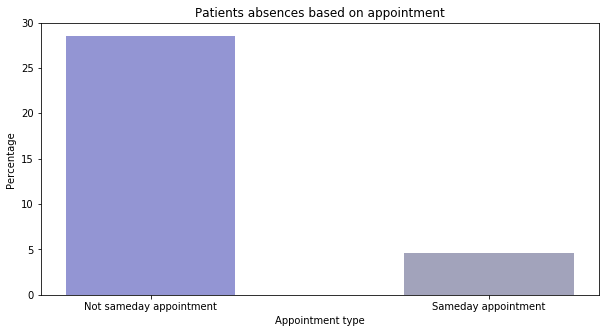

In [74]:
appointment_day = np.array(['Sameday appointment','Not sameday appointment'])
patients_no_show = [pr_patients_sameday,pr_patients_not_sameday_noshow]
Colors = ["#A2A3BB" , "#9395D3"]
plt.figure(figsize=(10,5))
plt.bar(appointment_day,patients_no_show,width=0.5,color=Colors)
plt.title('Patients absences based on appointment')
plt.xlabel('Appointment type')
plt.ylabel('Percentage ');

### Answer 7 :
    We conclude from the analysis above that patients who have scheduled appointments for the same day are more likely to   show up for their appointments .

<a id='conclusions'></a>
## Conclusions


After analyzing this dataset that gathers data from 110k medical appointments in Brazil , we found that 20% of patients didn't show up for the appointements that they schedueled due to a number of factors as fellows :

+ **Age** : We found that adults (age between 24 and 64) are more likely to miss their appointments fellowed by children (age between 0 and 14) then youth (age between 14 and 24) and then seniors (age above 64).
+ **SMS reception** : Patients that receive a SMS remanding them of their appointment are more likely to show up for it .
+ **Date of the appointment** : Patients that scheduled their appointments for the same day are more likely to attend.
+ **Handicap and Scholarship**  : Having a scholarship or having a handicap has no effect on whether a patient show up or not .
+ **Gender** : Being male or female has no effect on whether a patient show up or not .

 **Limitations :**
During the analysis of this dataset, various limitations emerged , for example :
+ The social status of the patients ( upper class , working class , or middle class) is not giving which might be a role in their absenteeism.
+ the marital status of the patients ( single, married, widowed, divorced) is also not giving which might be a role in their absenteeism.
